<a href="https://colab.research.google.com/github/yiwenwangANU/Machine_Learning/blob/main/Tensorflow_Certificate_Windowing_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras import layers

In [13]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)
for window_dataset in dataset:
  for var in window_dataset:
    print(var.numpy(), end=' ')
  print()

0 1 2 3 4 
1 2 3 4 5 
2 3 4 5 6 
3 4 5 6 7 
4 5 6 7 8 
5 6 7 8 9 


In [11]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
for window_dataset in dataset:
  print(window_dataset)

tf.Tensor([0 1 2 3 4], shape=(5,), dtype=int64)
tf.Tensor([1 2 3 4 5], shape=(5,), dtype=int64)
tf.Tensor([2 3 4 5 6], shape=(5,), dtype=int64)
tf.Tensor([3 4 5 6 7], shape=(5,), dtype=int64)
tf.Tensor([4 5 6 7 8], shape=(5,), dtype=int64)
tf.Tensor([5 6 7 8 9], shape=(5,), dtype=int64)


In [18]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
for x, y in dataset:
  print(x.numpy(), y.numpy())

[0 1 2 3] [4]
[1 2 3 4] [5]
[2 3 4 5] [6]
[3 4 5 6] [7]
[4 5 6 7] [8]
[5 6 7 8] [9]


In [22]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
dataset = dataset.shuffle(10)
dataset = dataset.batch(2).prefetch(1)
for x, y in dataset:
  print(x.numpy() )
  print(y.numpy())

[[3 4 5 6]
 [2 3 4 5]]
[[7]
 [6]]
[[5 6 7 8]
 [1 2 3 4]]
[[9]
 [5]]
[[0 1 2 3]
 [4 5 6 7]]
[[4]
 [8]]


In [28]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size+1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size+1))
  dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
  dataset = dataset.shuffle(shuffle_buffer)
  dataset = dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
  return dataset

In [34]:
new_dataset = windowed_dataset(np.arange(10), 5, 2, 10)
for windows, horizons in new_dataset.take(1):
  print(windows)
  print(horizons)

tf.Tensor(
[[4 5 6 7 8]
 [0 1 2 3 4]], shape=(2, 5), dtype=int64)
tf.Tensor(
[[9]
 [5]], shape=(2, 1), dtype=int64)


In [35]:
path_to_file = tf.keras.utils.get_file('Sunspots.csv', 'https://raw.githubusercontent.com/yiwenwangANU/Tensorflow_Certificate/main/Sunspots.csv')

81920/71461 [==================================] - 0s 0us/step


In [41]:
raw_df = pd.read_csv(path_to_file)
data_df = raw_df[{'Date', 'Monthly Mean Total Sunspot Number'}]
data_df

,Date,Monthly Mean Total Sunspot Number
0,1749-01-31,96.7
1,1749-02-28,104.3
2,1749-03-31,116.7
3,1749-04-30,92.8
4,1749-05-31,141.7
...,...,...
3260,2020-09-30,0.6
3261,2020-10-31,14.4
3262,2020-11-30,34.0
3263,2020-12-31,21.8


In [42]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3265 entries, 0 to 3264
Data columns (total 2 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               3265 non-null   object 
 1   Monthly Mean Total Sunspot Number  3265 non-null   float64
dtypes: float64(1), object(1)
memory usage: 51.1+ KB


In [43]:
data_df['Date'] = pd.to_datetime(data_df['Date'])
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3265 entries, 0 to 3264
Data columns (total 2 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               3265 non-null   datetime64[ns]
 1   Monthly Mean Total Sunspot Number  3265 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 51.1 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
data_df = data_df.set_index('Date')
data_df

,Monthly Mean Total Sunspot Number
Date,
1749-01-31,96.7
1749-02-28,104.3
1749-03-31,116.7
1749-04-30,92.8
1749-05-31,141.7
...,...
2020-09-30,0.6
2020-10-31,14.4
2020-11-30,34.0


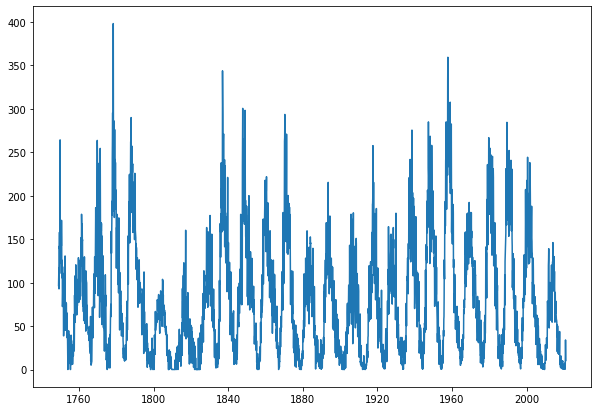

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.plot(data_df['Monthly Mean Total Sunspot Number'])